## Optimising Year-End Marketing Campaigns: Customer Targeting for Gold Membership Offer

### Project Overview
The superstore is gearing up for its year-end sale and plans to introduce a special gold membership offer. This membership offers a 20% discount on all purchases and costs just USD499 during the sale, compared to its regular price of USD999. The store aims to target this offer solely at existing customers and is currently organising a phone call campaign to reach them. To optimise campaign costs, the management seeks to develop a predictive model that will classify which customers are likely to opt for this membership.
    
[About this dataset](https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset/data)

**Objective:**

The primary objective is to predict customer responsiveness to the new gold membership offer. Additionally, the model aims to identify key factors influencing customer decisions. By analysing the provided data, we will construct a predictive model that estimates the probability of a customer responding positively to the offer.

### Data dictionary
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- ID - Unique ID of each customer
- Year_Birth - Age of the customer
- Complain - 1 if the customer complained in the last 2 years
- Dt_Customer - date of customer's enrollment with the company
- Education - customer's level of education
- Marital - customer's marital status
- Kidhome - number of small children in customer's household
- Teenhome - number of teenagers in customer's household
- Income - customer's yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company's website
- NumWebVisitsMonth - number of visits to company's website in the last month
- Recency - number of days since the last purchase

In [1]:
#!pip install xgboost

In [2]:
# Import Libraries

import re

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

# Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [3]:
# Load the dataset
csv_file = 'superstore_data.csv'
df = pd.read_csv(csv_file)

# Check data has loaded correctly
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


# Data Cleaning and EDA
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent the absence of data)

In [4]:
## Check the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [6]:
# Handling missing values
## Since 'Income' is the only column with missing values, will fill it with the median income
df['Income'].fillna(df['Income'].median(), inplace=True)

# Data type conversion
## Convert 'Dt_Customer' to datetime format. Rename column, extract month and year and create 2 new columns
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.rename(columns={'Dt_Customer': 'Enroll'}, inplace=True)
df['Enroll_Month'] = df['Enroll'].dt.month
df['Enroll_Year'] = df['Enroll'].dt.year

# Remove the 'Id' column
df.drop('Id', axis=1, inplace=True)

df.sample(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Enroll,Recency,MntWines,MntFruits,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Enroll_Month,Enroll_Year
705,1959,Master,Married,77520.0,0,1,2013-08-28,30,940,44,...,58,1,8,7,7,4,1,0,8,2013
1772,1960,Graduation,Together,63381.0,0,1,2012-05-10,78,571,50,...,159,4,4,5,13,2,0,0,5,2012
2087,1961,Graduation,Married,60544.0,1,1,2012-08-25,92,201,2,...,35,4,5,1,5,6,0,0,8,2012
1541,1945,PhD,Married,65846.0,0,0,2013-05-17,68,562,81,...,81,1,6,3,6,4,0,0,5,2013
599,1986,Graduation,Married,25252.0,1,0,2013-12-07,26,1,3,...,6,1,1,0,2,8,0,0,12,2013


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


In [8]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [9]:
total_count = 1906 + 334  # Total responses
percentage_no_response = (1906 / total_count) * 100  # Percentage for 0 (No response)
percentage_yes_response = (334 / total_count) * 100  # Percentage for 1 (Yes response)

percentage_no_response, percentage_yes_response

(85.08928571428571, 14.910714285714285)

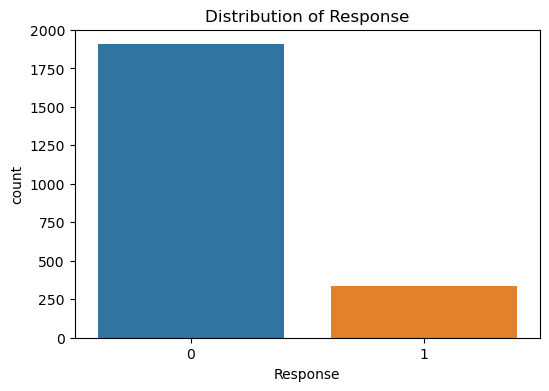

In [10]:
# Distribution of the target variable 'Response'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Response')
plt.title('Distribution of Response')

plt.show()

In [11]:
# Copy of the original dataset before making categorizations
df_original = df.copy()

# Categorical Variables

## Categorize 'Income' into income brackets
income_bins = [0, 30000, 50000, 70000, 90000, 120000, np.inf]
income_labels = ['<30k', '30k-50k', '50k-70k', '70k-90k', '90k-120k', '>120k']
df['Income_Category'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)

## Categorize 'Recency' into groups
recency_bins = [0, 30, 60, 90, np.inf]
recency_labels = ['0-30', '31-60', '61-90', '>90']
df['Recency_Category'] = pd.cut(df['Recency'], bins=recency_bins, labels=recency_labels, right=False)

## Categorize 'Year_Birth' into age groups
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['Year_Birth']
age_bins = [0, 25, 35, 45, 55, 65, np.inf]
age_labels = ['<25', '25-34', '35-44', '45-54', '55-64', '>64']
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Dataset with new categorical variables
df[['Income', 'Income_Category', 'Recency', 'Recency_Category', 'Age', 'Age_Category']].sample(10), df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2240 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Enroll               2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

(       Income Income_Category  Recency Recency_Category  Age Age_Category
 2126  35441.0         30k-50k       94              >90   56        55-64
 1835  59304.0         50k-70k       81            61-90   59        55-64
 1265  62220.0         50k-70k       55            31-60   51        45-54
 400   60585.0         50k-70k       17             0-30   52        45-54
 1168  81380.0         70k-90k       51            31-60   56        55-64
 531   22585.0            <30k       23             0-30   53        45-54
 1959  88420.0         70k-90k       87            61-90   34        25-34
 326   81843.0         70k-90k       13             0-30   63        55-64
 1935  71466.0         70k-90k       86            61-90   49        45-54
 949   79632.0         70k-90k       42            31-60   49        45-54,
 None)

Reasoning:
- Income_Category: This categorisation can make the analysis more interpretable by breaking down income levels into understandable brackets.
- Recency_Category: This will help us better understand customer engagement by categorising customers based on how recently they have made a purchase.
- Age_Category: Different age groups often have different buying habits, which could be crucial for targeting.

These additional informations offer a more segmented view of customer behaviours, which can be valuable when looking for patterns or clusters in the data.

In [12]:
df.sample(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Enroll,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Enroll_Month,Enroll_Year,Income_Category,Recency_Category,Age,Age_Category
300,1982,Master,Single,75777.0,0,0,2013-04-07,12,712,26,...,11,1,1,0,4,2013,70k-90k,0-30,41,35-44
660,1963,Graduation,Married,50437.0,0,2,2012-10-17,28,370,9,...,8,7,0,0,10,2012,50k-70k,0-30,60,55-64
1313,1982,Graduation,Single,28567.0,1,0,2013-06-17,57,11,3,...,3,6,0,0,6,2013,<30k,31-60,41,35-44
692,1985,Graduation,Married,44322.0,1,0,2014-06-16,30,46,0,...,3,8,0,0,6,2014,30k-50k,31-60,38,35-44
1701,1971,Graduation,Married,25721.0,1,0,2013-05-21,75,1,3,...,2,7,1,0,5,2013,<30k,61-90,52,45-54


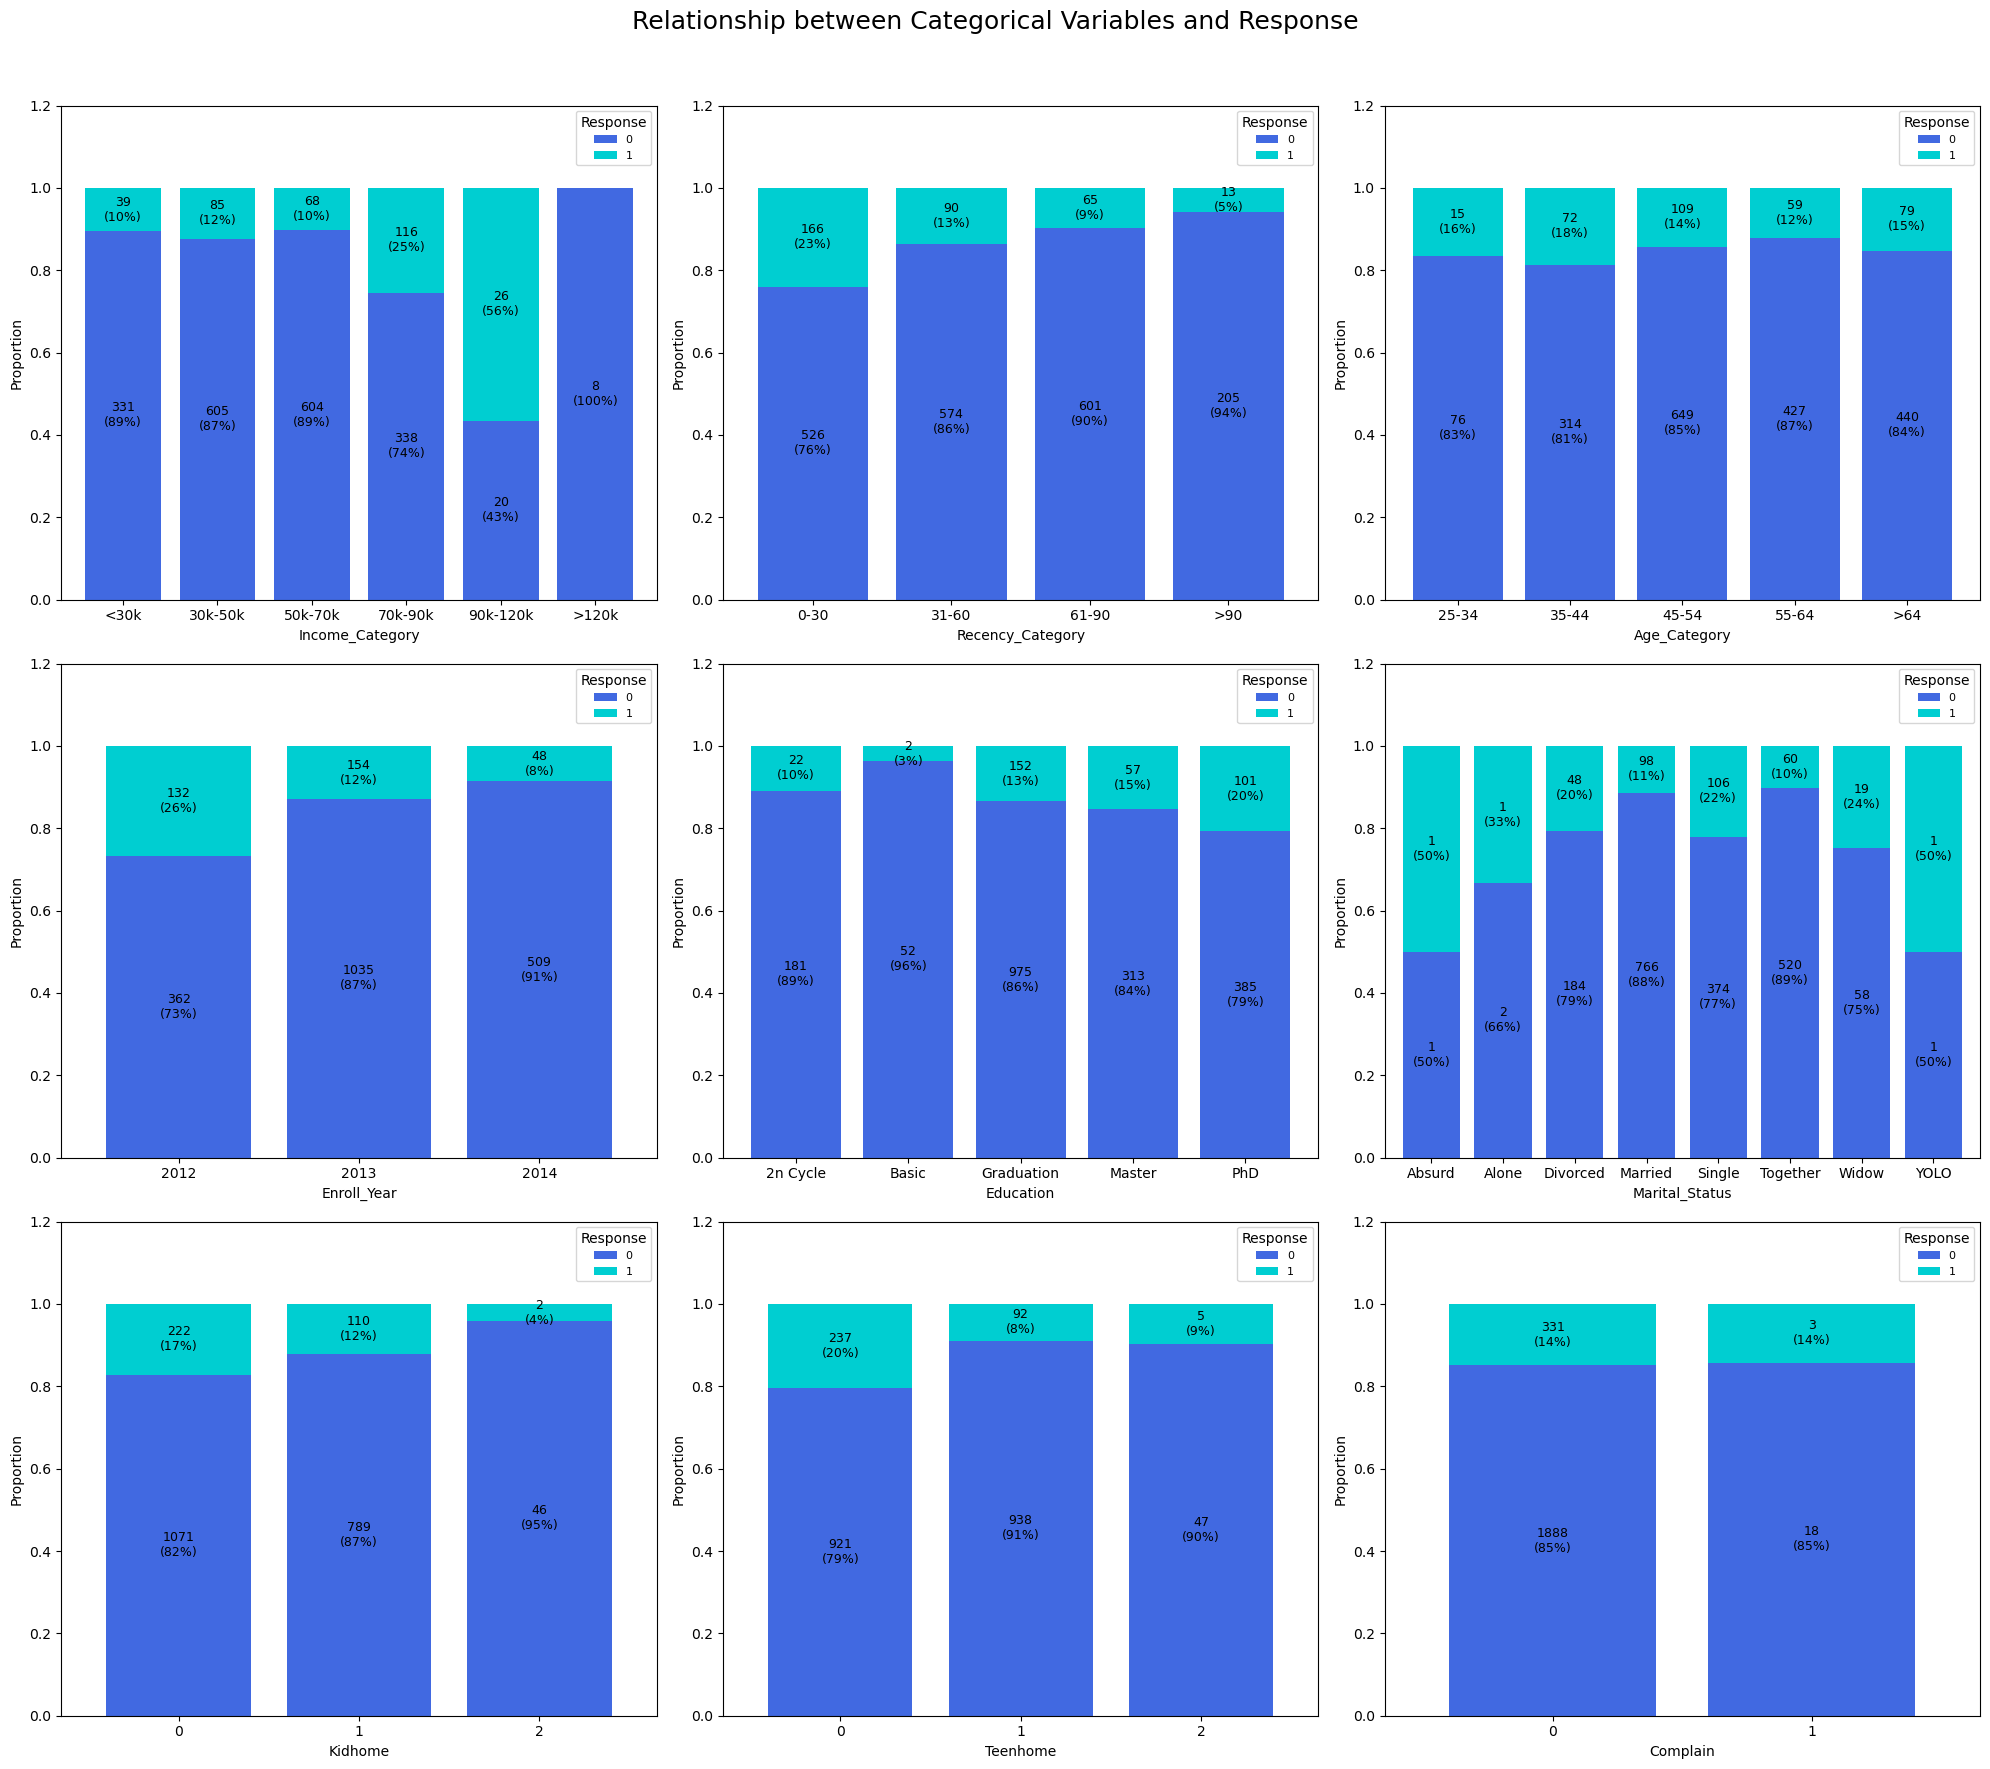

In [13]:
from matplotlib.colors import ListedColormap

# Stacked barplot reference from Github

cat_vars = ['Income_Category', 'Recency_Category', 'Age_Category', 
            'Enroll_Year', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Complain']
target_var = 'Response'

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 18), dpi=100)

# Loop through each categorical variable
for i, col in enumerate(cat_vars):
    
    # Cross-tabulation of the counts of the target categories for each feature category
    cross_tab = pd.crosstab(index=df[col], columns=df[target_var])
    
    # Normalize the cross-tabulation to get proportions
    cross_tab_prop = pd.crosstab(index=df[col], columns=df[target_var], normalize='index')

    # Define colormap
    cmp = ListedColormap(['royalblue', 'darkturquoise'])
    
    # Plot stacked bar chart
    x, y = i // 3, i % 3
    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, colormap=cmp, width=0.8,
                        legend=False, ylabel='Proportion')
    
    # Add annotations for counts and proportions
    for idx, val in enumerate(cross_tab.index.values):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            if proportion * 100 >= 2:  # Show percentages >= 2%
                ax[x, y].text(x=idx, y=(y_location - proportion) + (proportion / 2),
                             s=f"{count}\n({int(proportion * 100)}%)", 
                             ha='center', va='center', color="black", fontsize=9)
                
    ax[x, y].legend(title='Response', loc='upper right', fontsize=8)
    ax[x, y].set_ylim([0, 1.2])
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=0, ha='center')
            
plt.suptitle('Relationship between Categorical Variables and Response', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent overlap

# Save the plot as a JPG file
plt.savefig('catvars_vs_response.jpg', dpi=300, bbox_inches='tight')

plt.show()

Analysis:
- Income_Category: Higher-income groups show a better response rate.
- Recency_Category: Customers who have shopped more recently are more likely to respond.
- Age_Category: The 35-44 age group has the highest response rate.
- Enroll_Year: Newer enrollments are less likely to respond.
- Education: Customers with a PhD are more likely to respond.
- Marital_Status: Single and married individuals respond more favorably.
- Kidhome and Teenhome: The presence of kids or teens in the home doesn't show a clear pattern in terms of response.
- Complain: Very few people who have complained in the last 2 years responded to the campaign.

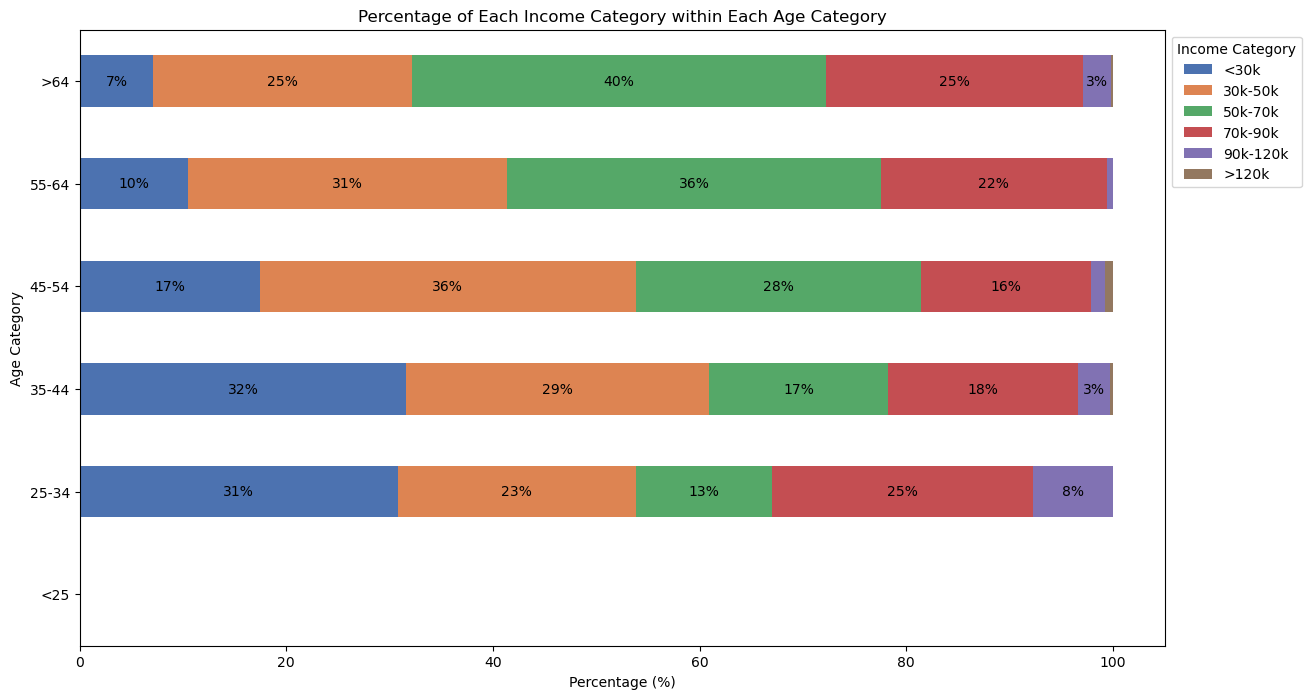

In [14]:
# Stacked bar plot data to showcase relationship between age group and income bracket
age_income_count = df.groupby(['Age_Category', 'Income_Category']).size().reset_index(name='Counts')
pivot_age_income = age_income_count.pivot('Age_Category', 'Income_Category', 'Counts').fillna(0)

# Normalize to show percentage
pivot_age_income_norm = (pivot_age_income.div(pivot_age_income.sum(1), axis=0) * 100).fillna(0)

ax = pivot_age_income_norm.plot(kind='barh', 
                                stacked=True, 
                                color=sns.color_palette('deep', len(income_labels)), 
                                figsize=(14, 8))

# Add annotations for percentages
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width >= 2:  # Only annotate if the width (i.e., the percentage) is greater or equal to 2
        ax.annotate(f"{int(round(width, 0))}%", (left + width / 2, bottom + height / 2), ha='center', va='center')

plt.title('Percentage of Each Income Category within Each Age Category')
plt.xlabel('Percentage (%)')
plt.ylabel('Age Category')
plt.legend(title='Income Category', bbox_to_anchor=(1, 1))

# Save the plot as a JPG file
plt.savefig('income_vs_age.jpg', dpi=300, bbox_inches='tight')

plt.show()

Analysis:
- The age group "45-54" seems to be more prevalent in the higher income categories like "70k-90k" and "90k-120k". Meanwhile, younger age groups like "25-34" and "<25" are more common in lower income categories.
- This can provide valuable insights for targeted marketing strategies or customer segmentation.

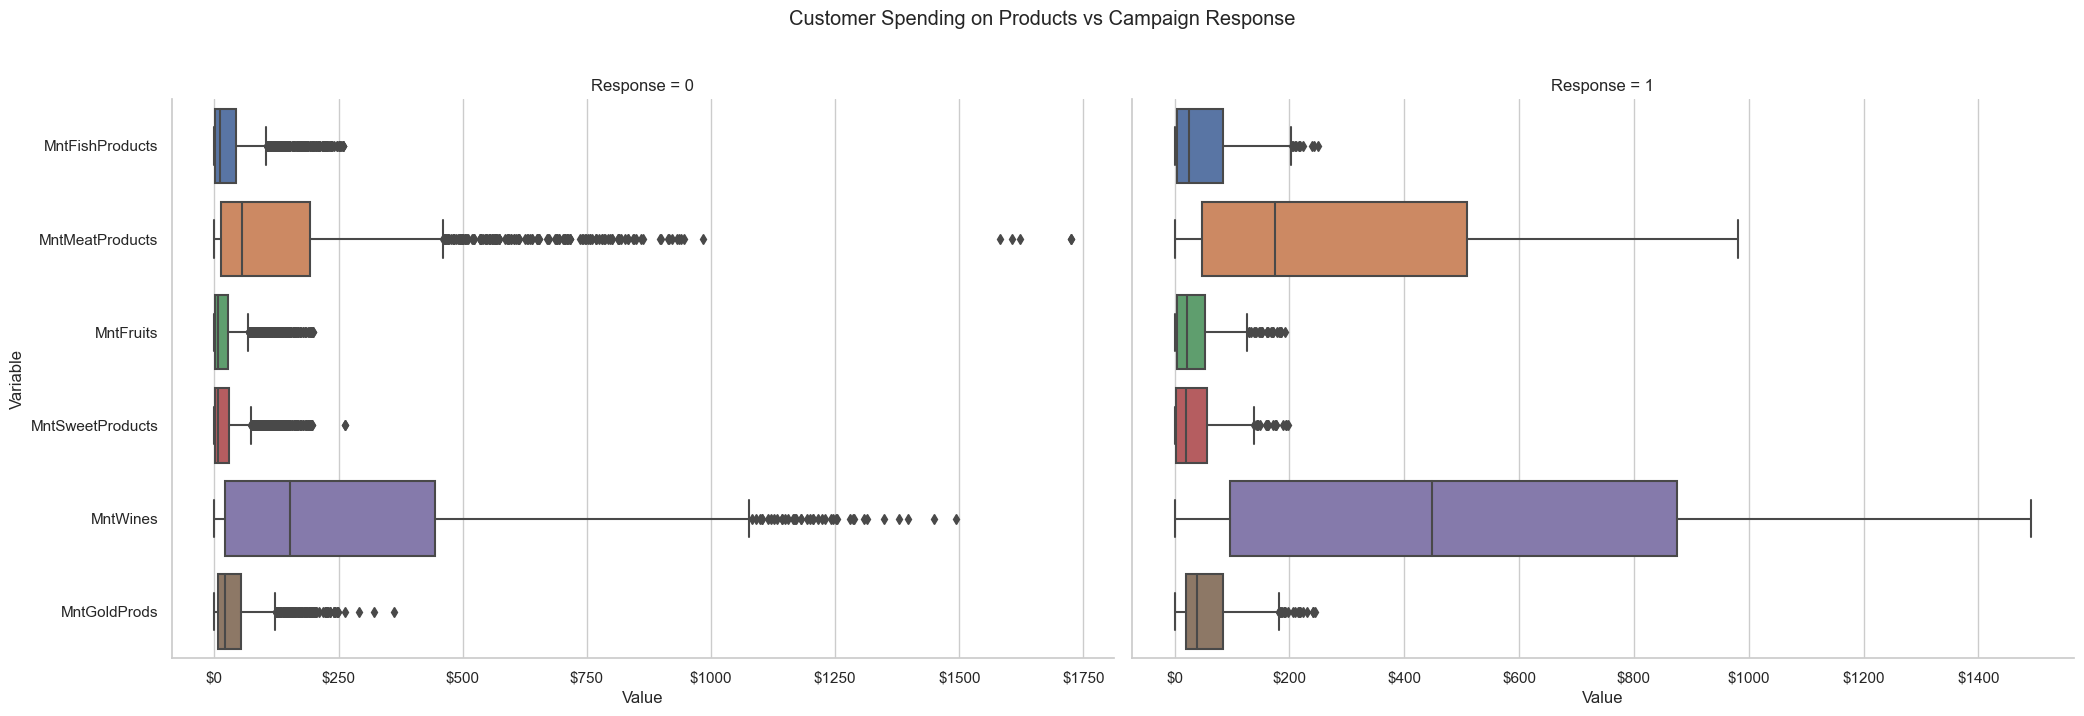

In [15]:
# Catplot example from Seaborn documentation

# Melt the DataFrame to long-form for variables that are in dollar value
df_dollar_value = df.melt(id_vars=['Response'], value_vars=['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds'], var_name='variable', value_name='Dollar Value')

sns.set(style='whitegrid')

g_dollar_value = sns.catplot(
    data=df_dollar_value,
    x='Dollar Value', y='variable', col='Response',
    kind='box', orient='h', 
    sharex=False, margin_titles=True, 
    height=7, aspect=1.5  
)

g_dollar_value.set_axis_labels('Value', 'Variable')
g_dollar_value.set_titles(col_template='Response = {col_name}')

# Format x-axis labels as dollar amounts
for ax in g_dollar_value.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')

g_dollar_value.fig.suptitle('Customer Spending on Products vs Campaign Response', y=1.02)
plt.tight_layout()

# Save the plot as a JPG file
plt.savefig('products_vs_response.jpg', dpi=300, bbox_inches='tight')

plt.show()

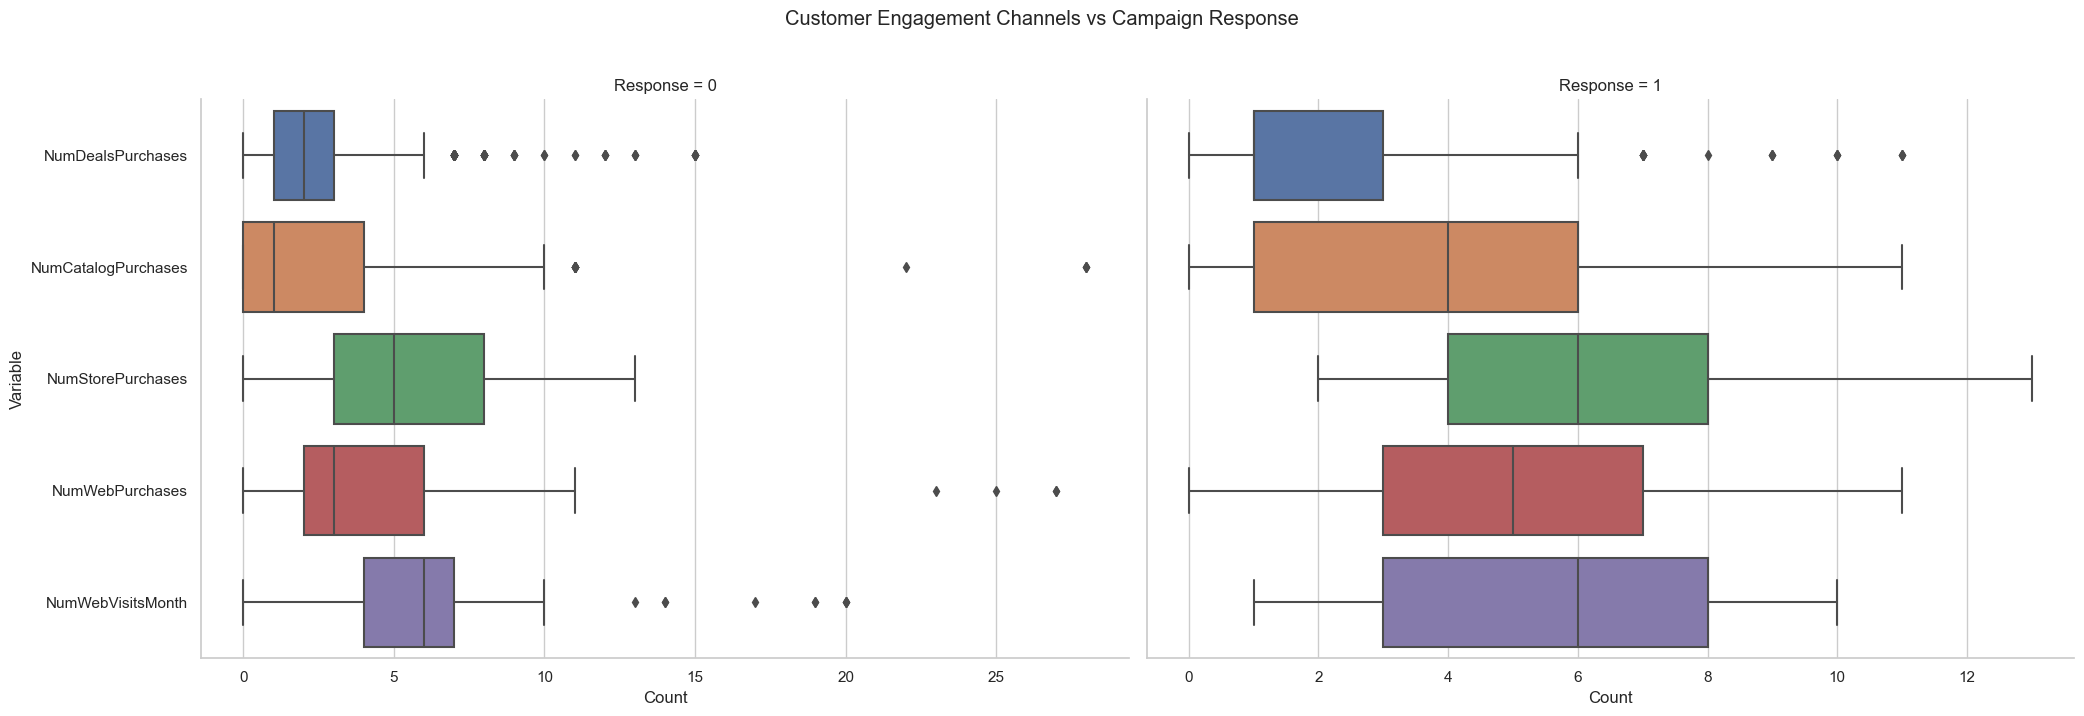

In [16]:
count_vars = ['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']

# Melt the DataFrame to long-form for count variables
df_long_counts = df.melt(id_vars=['Response'], value_vars=count_vars, var_name='variable', value_name='Count')

sns.set(style='whitegrid')

g_count = sns.catplot(
    data=df_long_counts,
    x='Count', y='variable', col='Response',
    kind='box', orient='h', 
    sharex=False, margin_titles=True, 
    height=7, aspect=1.5
)

g_count.set_axis_labels('Count', 'Variable')
g_count.set_titles(col_template='Response = {col_name}')
g_count.fig.suptitle('Customer Engagement Channels vs Campaign Response', y=1.02)

plt.tight_layout()

# Save the plot as a JPG file
plt.savefig('channels_vs_response.jpg', dpi=300, bbox_inches='tight')

plt.show()

Analysis:
- High Spenders: Customers who accepted the offer generally spend more on fish, meat, and especially wines.
- Deal Sensitivity: No significant difference in the number of discounted purchases between those who accepted and didn't accept the offer.
- Purchase Channels: Those who accepted the offer tend to make more purchases via catalog and in stores.
- Web Engagement: Similar web visit frequencies for both groups, but those who accepted the offer make more web purchases.
- **Customer Expenditure vs Response:** Higher spending on wines and meats correlates with a positive response to the campaign.
- **Purchase Channels and Web Visits vs Response:** Customers who make more catalog purchases and visit the company's website more frequently are more likely to respond positively to the campaign.

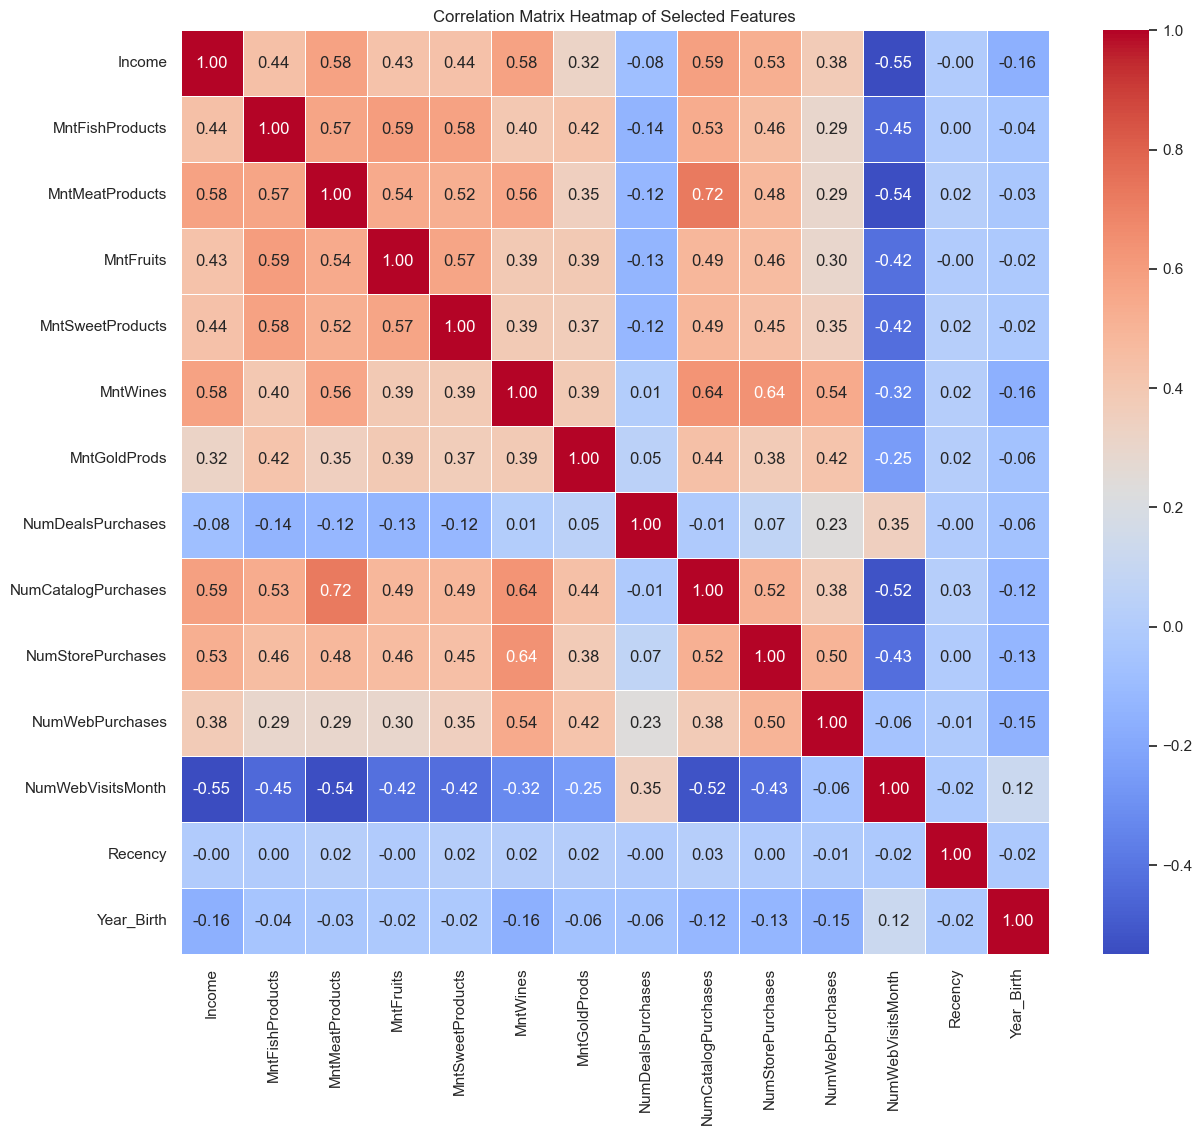

In [17]:
selected_features = ['Income', 'MntFishProducts', 'MntMeatProducts', 
                    'MntFruits', 'MntSweetProducts', 'MntWines', 
                    'MntGoldProds', 'NumDealsPurchases', 
                    'NumCatalogPurchases', 'NumStorePurchases', 
                    'NumWebPurchases', 'NumWebVisitsMonth', 
                    'Recency', 'Year_Birth']

corr_matrix = df[selected_features].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title('Correlation Matrix Heatmap of Selected Features')

# Save the plot as a JPG file
plt.savefig('correlation_matrix.jpg', dpi=300, bbox_inches='tight')

plt.show()

Analysis:
- 'Income' and 'MntWines' show a strong positive correlation of 0.58, indicating that as income increases, spending on wines also tends to increase.
- 'NumCatalogPurchases' and 'MntMeatProducts' have a positive correlation of 0.57, suggesting these purchases often occur through catalogs.
- 'NumWebPurchases' and 'MntWines' are also positively correlated at 0.54, suggesting that higher wine purchases often happen through the web.

Recommendation:
- Target higher-income and recently active customers, especially those between the ages of 35-44.
- Focus on customers who spend more on wines and meats and engage via catalogs and the web.

In [18]:
# Correlation between all features and the target variable 'Response'
corr_with_target = df.corr()['Response'].sort_values(ascending=False)
corr_with_target

Response               1.000000
MntWines               0.247254
MntMeatProducts        0.236335
NumCatalogPurchases    0.220810
NumWebPurchases        0.148730
MntGoldProds           0.139850
Income                 0.132867
MntFruits              0.125289
MntSweetProducts       0.117372
MntFishProducts        0.111331
NumStorePurchases      0.039363
Enroll_Month           0.021873
Year_Birth             0.021325
NumDealsPurchases      0.002238
Complain              -0.001707
NumWebVisitsMonth     -0.003987
Age                   -0.021325
Kidhome               -0.080008
Teenhome              -0.154446
Enroll_Year           -0.171030
Recency               -0.198437
Name: Response, dtype: float64

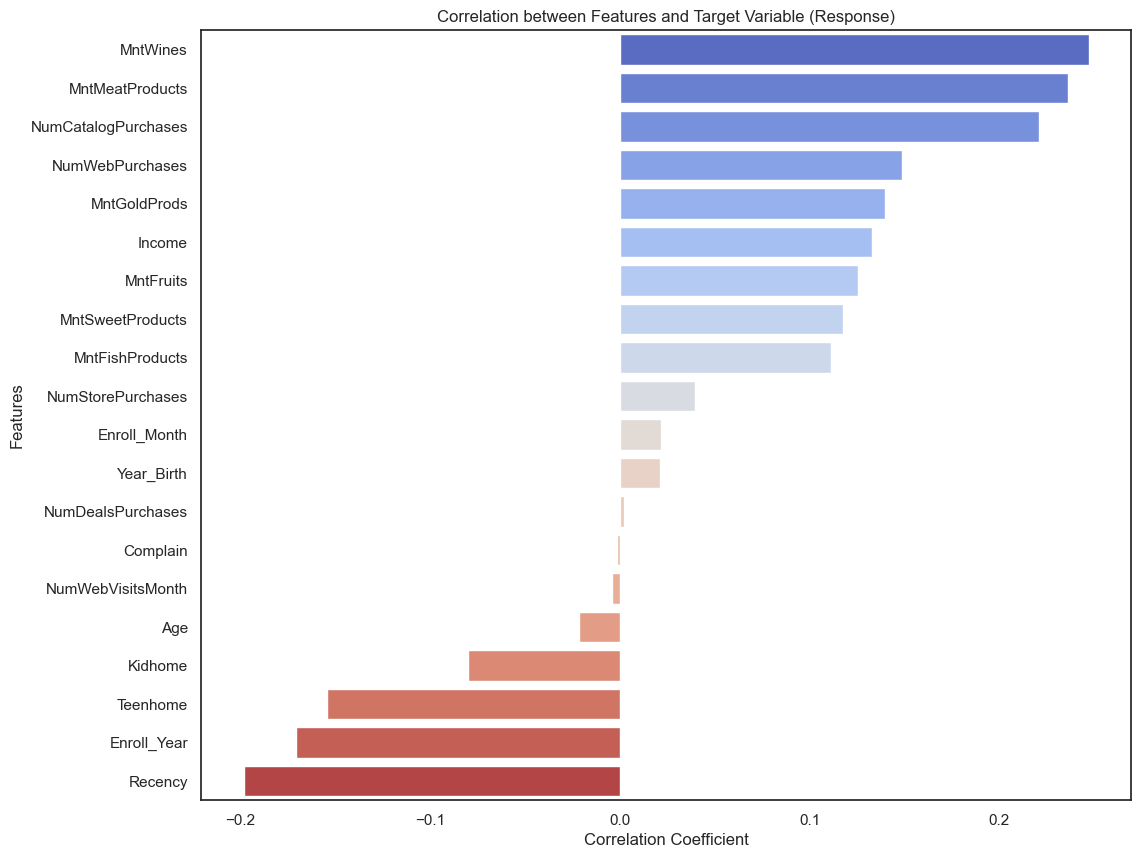

In [19]:
# Exclude target variable from the plot

sns.set_style('white')

plt.figure(figsize=(12, 10))
sns.barplot(x=corr_with_target.drop('Response'), y=corr_with_target.drop('Response').index, palette='coolwarm')
plt.title('Correlation between Features and Target Variable (Response)')
plt.ylabel('Features')
plt.xlabel('Correlation Coefficient')

# Save the plot as a JPG file
plt.savefig('correlation_features_vs_target.jpg', dpi=300, bbox_inches='tight')

plt.show()

Analysis:
- **High Positive Correlation:** Features such as 'MntWines', 'MntMeatProducts', and 'NumCatalogPurchases' have a relatively high positive correlation with 'Response'. This suggests that these variables are strong predictors for a customer's likelihood to accept the offer.
- **Negative Correlation:** Variables like 'Recency', 'Enroll_Year', and 'Teenhome' show a negative correlation with customer acceptance. This suggests that more recent customers and those who have enrolled more recently may be less likely to accept the offer, although the correlation is not extremely strong.
- The features 'NumWebVisitsMonth', 'Complain', and 'NumDealsPurchases' could be omitted from our predictive model due to their minimal correlation with the target variable, 'Response'.

Key Takeaways:
- Higher spending on wines and meats, as well as catalog purchases, are strong indicators of a positive response to the campaign.

# Data Preparation

In [20]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

df2 = df.copy()

label_encoder = LabelEncoder()
categorical_columns = df2.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_columns:
    df2[col] = label_encoder.fit_transform(df2[col].astype(str))

df2.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Enroll,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Enroll_Month,Enroll_Year,Income_Category,Recency_Category,Age,Age_Category
0,1970,2,2,84835.0,0,0,2014-06-16,0,189,104,...,6,1,1,0,6,2014,2,0,53,2
1,1961,2,4,57091.0,0,0,2014-06-15,0,464,5,...,7,5,1,0,6,2014,1,0,62,3
2,1958,2,3,67267.0,0,1,2014-05-13,0,134,11,...,5,2,0,0,5,2014,1,0,65,4
3,1967,2,5,32474.0,1,1,2014-11-05,0,10,0,...,2,7,0,0,11,2014,0,0,56,3
4,1989,2,4,21474.0,1,0,2014-08-04,0,6,16,...,2,7,1,0,8,2014,4,0,34,0


# Modelling
> - RandomForestClassifier
> - GradientBoostingClassifier
> - ExtraTreesClassifier
> - AdaBoostClassifier
> - DecisionTreeClassifier

In [21]:
X = df2.drop(['Response', 'Enroll', 'NumWebVisitsMonth', 'Complain', 'NumDealsPurchases'], axis=1)
y = df2['Response']

In [22]:
# Results DataFrame
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

In [23]:
def show_summary_report(actual, prediction, model_name):
    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(float)

    prediction_int = np.round(prediction)

    accuracy_ = accuracy_score(actual, prediction_int)
    precision_ = precision_score(actual, prediction_int)
    recall_ = recall_score(actual, prediction_int)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction_int)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction_int)
    average_precision = average_precision_score(actual, prediction_int)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues', ax=ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color='b', alpha=0.2, where='post')
    ax[1].fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc='lower right')
    
    # Save the plot as a JPG file for each model
    plt.savefig(f'{model_name}_best_model.jpg', dpi=300, bbox_inches='tight')
    
    plt.show()

    return (accuracy_, precision_, recall_, roc_auc_)

In [24]:
# Function to fit models and evaluate performance
def fit_and_evaluate(models, param_grids, X_train, y_train, X_test, y_test):
    global results
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])
    best_score = 0
    best_model_name = ""
    best_model = None
    
    for model_name, model in models.items():
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1', verbose=0, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        current_best_model = grid_search.best_estimator_

        current_best_model.fit(X_train, y_train)
        predictions = current_best_model.predict_proba(X_test)[:, 1]

        accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions, model_name)
        
        # Calculate a combined score based on accuracy and precision
        combined_score = (accuracy_ + precision_) / 2
        if combined_score > best_score:
            best_score = combined_score
            best_model_name = model_name
            best_model = current_best_model  # Update the overall best model
            
        results = results.append({
            'Model': model_name,
            'Accuracy': accuracy_,
            'Precision': precision_,
            'Recall': recall_,
            'ROC_AUC': roc_auc_
        }, ignore_index=True)
    
    print(f'The best model is {best_model_name} with a combined score of {best_score}')    
    return best_model  # Return only the overall best model

In [25]:
# Function to plot feature importance
def plot_feature_importance(model, X_columns):
    feature_importances = model.feature_importances_
    feature_importance_map = {feature: importance for feature, importance in zip(X_columns, feature_importances)}
    sorted_features = sorted(feature_importance_map.items(), key=lambda x: x[1], reverse=True)
    sorted_names = [x[0] for x in sorted_features]
    sorted_scores = [x[1] for x in sorted_features]
    
    plt.figure(figsize=(15, 8))
    plt.barh(sorted_names, sorted_scores, color='skyblue')
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title(f'Feature Importance Plot for {type(model).__name__}')
    plt.savefig(f'{type(model).__name__}_Feature_Importance.jpg', dpi=300, bbox_inches='tight')
    plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Models and their parameter grids
models = {
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42)  # Added Decision Trees
}

param_grids = {
    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'GradientBoostingClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]},
    'ExtraTreesClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'AdaBoostClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'DecisionTreeClassifier': {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}  
}

# Data splitting and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model fitting and evaluation
#fit_and_evaluate(models, param_grids, X_train_scaled, y_train, X_test_scaled, y_test)

Accuracy : 0.8728 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6667 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.2985 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8860                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


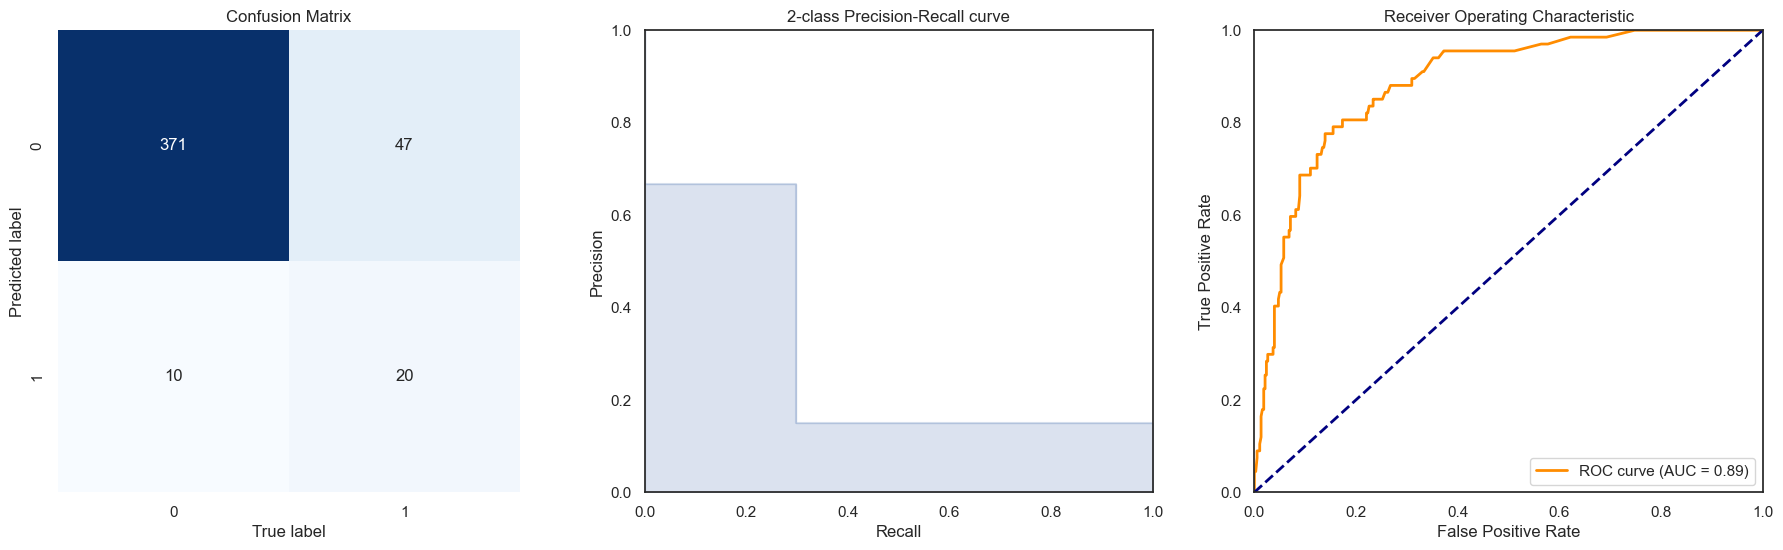

Accuracy : 0.8750 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6170 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4328 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8739                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


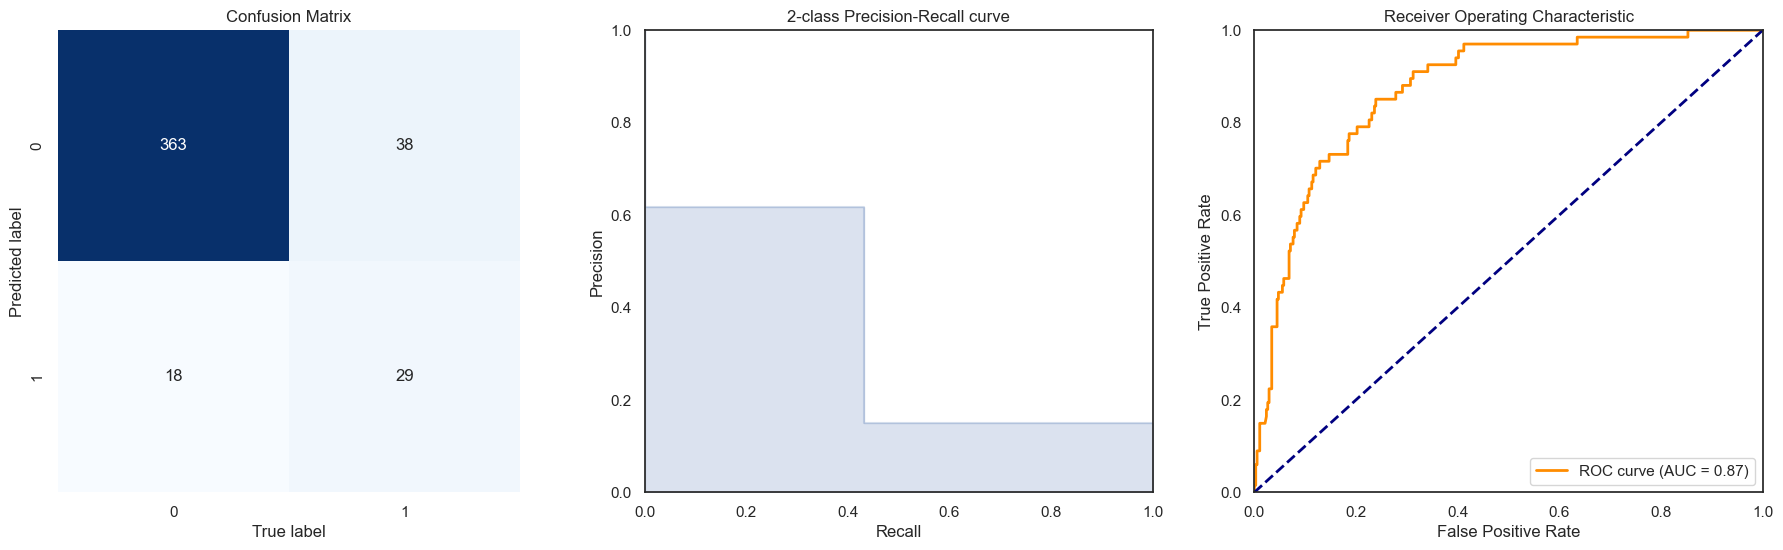

Accuracy : 0.8594 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5833 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.2090 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8874                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


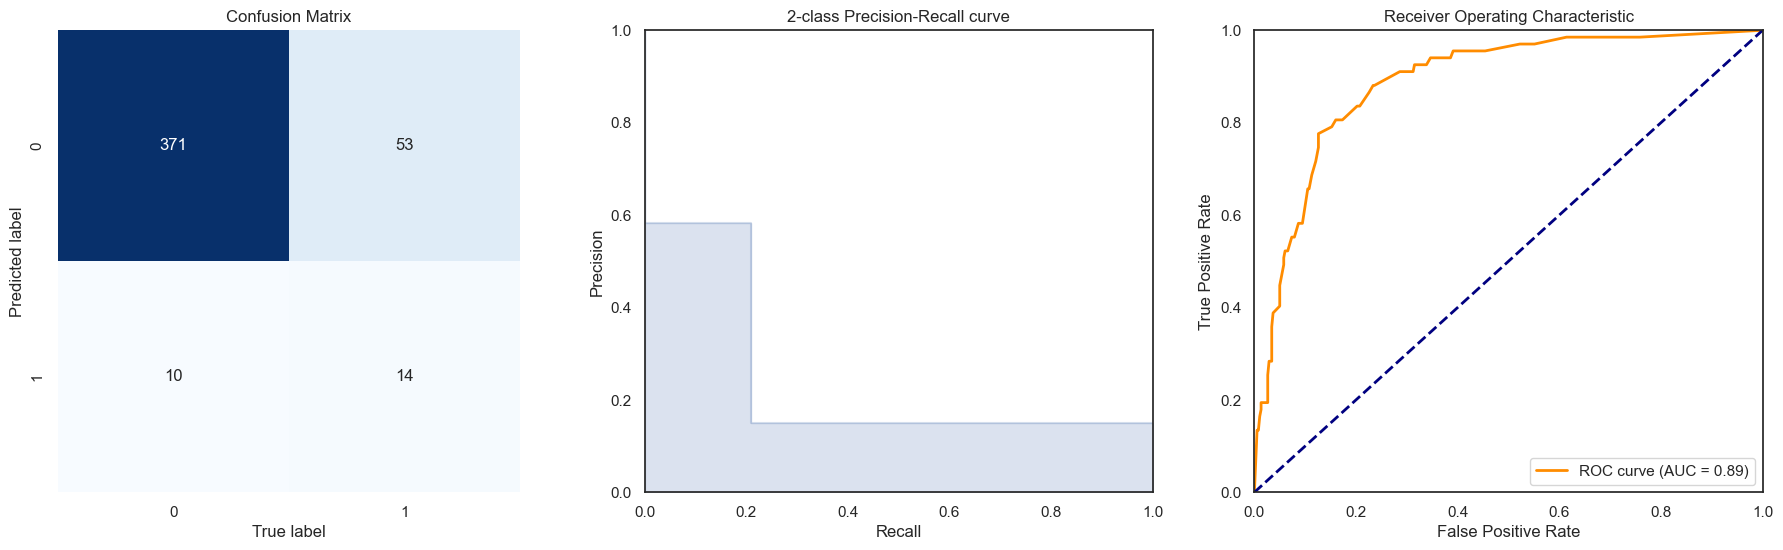

Accuracy : 0.8728 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6136 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4030 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8589                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


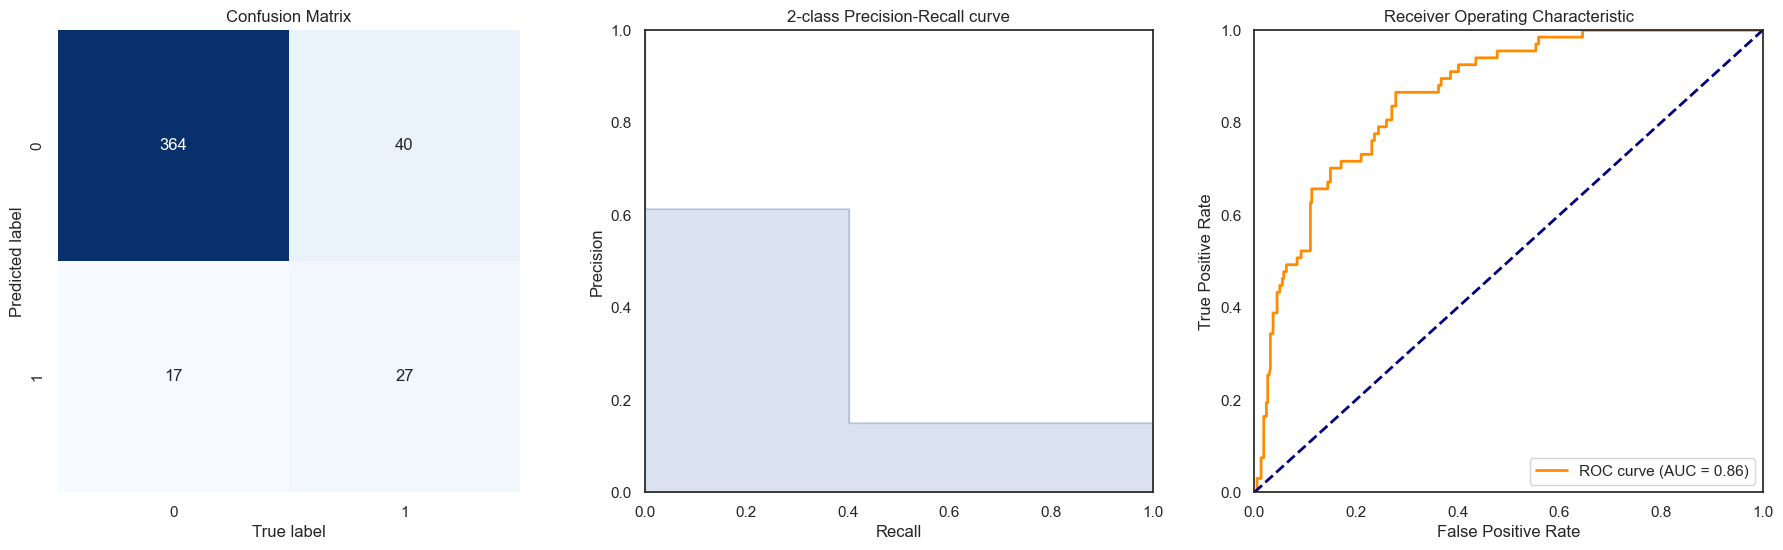

Accuracy : 0.8504 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4776 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6984                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


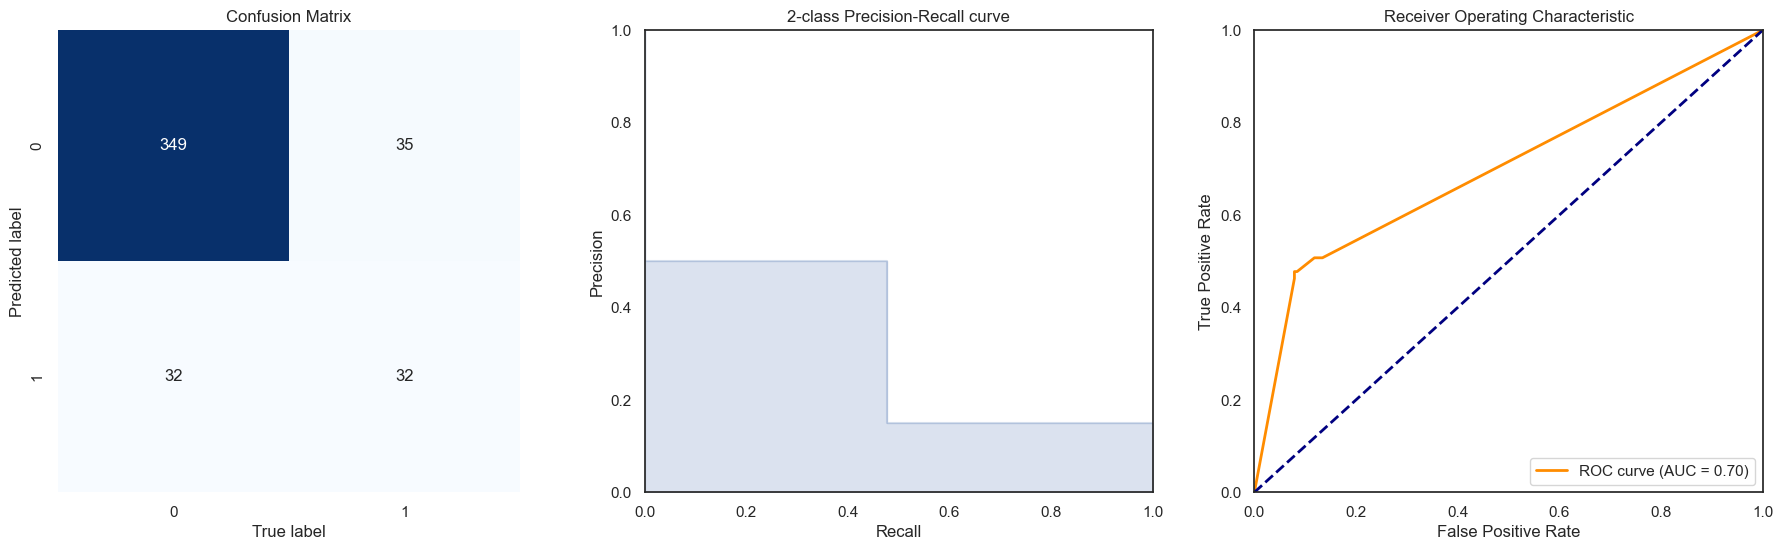

The best model is RandomForestClassifier with a combined score of 0.7697172619047619


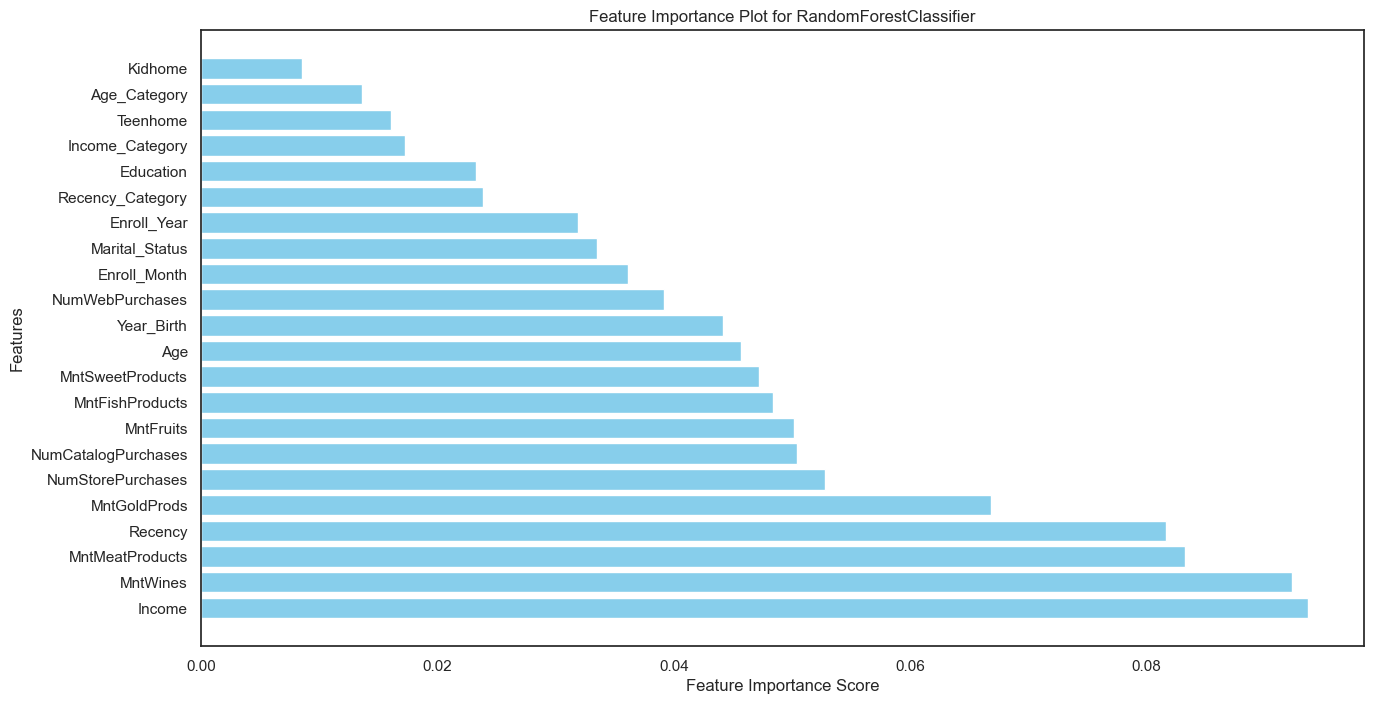

In [27]:
# Fit and evaluate models
best_model = fit_and_evaluate(models, param_grids, X_train_scaled, y_train, X_test_scaled, y_test)

# Plot feature importance only for the best model
plot_feature_importance(best_model, X.columns)

In [28]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,RandomForestClassifier,0.872768,0.666667,0.298507,0.886003
1,GradientBoostingClassifier,0.875000,0.617021,0.432836,0.873879
2,ExtraTreesClassifier,0.859375,0.583333,0.208955,0.887374
3,AdaBoostClassifier,0.872768,0.613636,0.402985,0.858875
4,DecisionTreeClassifier,0.850446,0.500000,0.477612,0.698359


### Analytical Summary

In the context of our specific business objective, which is to predict customer responsiveness to a new gold membership offer, Precision is a key metric. A higher Precision means fewer false positives, which in turn means that the campaign would target fewer customers who are interested, thus optimising costs. 

- The best model is the RandomForest with an accuracy of 87.3%, precision of 66.7%, recall of 29.8%, and ROC-AUC of 88.6%.
- Resource Optimisation: The high precision (66.7%) indicates that about two-thirds of the calls made based on the model's prediction would be to customers who are likely to accept the offer, making the campaign more cost-effective.
- Revenue Maximisation: Although the recall is at 29.8%, this isn't necessarily detrimental. It means the model is conservative and focuses on higher likelihood prospects. The focus here is quality over quantity, aiming for higher conversion rates.
- Reliability: With a ROC-AUC of 88.6%, the model reliably distinguishes between those who are likely to buy the membership and those who are not, making it a robust tool for this campaign.

## Recommendation

- Tailored Campaigns: Use feature importance insights to tailor the phone call campaign.
- Resource Allocation: Allocate more resources to customers that the model identifies as likely to opt in.
- Continuous Learning: The model should be updated periodically for better performance.